## SIR model with one group

Este modelo lo armamos para comparar la performance de PyRoss vs la del modelos pythranizado desarrollado por nosotros.

Vamos a empezar con un modelo con una subpoblación y con los siguientes parámetros.

El modelo es un SIR simple de la siguiente forma:

\begin{align*}
\dot S &= -\frac{\beta I}{N}S \\
\dot I &= \frac{\beta I}{N}I - \gamma I \\
\dot R &= \gamma I 
\end{align*}

Los valores de parámetros que vamos a usar son:

\begin{align*}
\beta =  0.5 \\
\gamma = 0.5
\end{align*}

Y los valores iniciales:

\begin{align*}
S_{ini} = 900 \\
I_{ini} = 100 \\
R_{ini} = 0 \\
N_{ini} = 1000
\end{align*}

In [2]:
# M=1, SIR with one age-groups

import numpy as np
import pyross
import copy
from time import perf_counter

import matplotlib.pyplot as plt

In [3]:
# The definition of the model as a Python dictionary
model_spec = { "classes" : ["S", "I"],

             "S" : {"infection" : [ ["I","S", "-beta"] ]},  ## the I class passes infection to S class
             "I" : { "linear"    : [ ["I", "-gamma"] ],     ## this is recovery process for I class
                    "infection" : [ ["I", "S", "beta"]]}    
             
              ## the recovered class R is internally determined by number conservation
             }


parameters = {'beta'  : 0.5,
              'gamma' : 0.1, 
              }

M=1;  Ni=1000*np.ones(M);  N=np.sum(Ni) 

# Initial conditions as an array
x0 = np.array([
    90,  # S
    10,  # I
])

CM = np.array( [[1]], dtype=float)

def contactMatrix(t):
    return CM

# duration of simulation and data file
Tf = 3000;  Nf = Tf+1


In [4]:
# Define de model
model = pyross.deterministic.Model(model_spec, parameters, M, Ni)

In [5]:
# Simulate (and time) the model 
t_ini = perf_counter()
data = model.simulate(x0, contactMatrix, Tf, Nf)
t_end = perf_counter() - t_ini
print(t_end)

0.005164999980479479


Text(0.5, 0, 'Days')

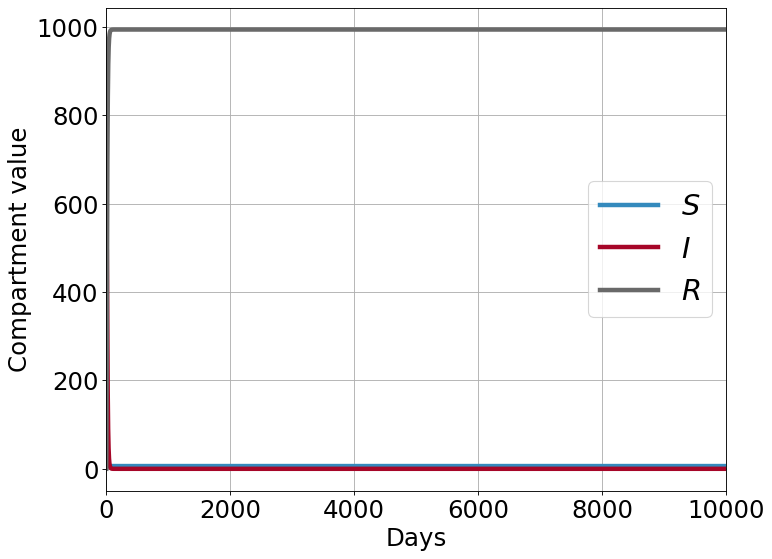

In [32]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
I = np.sum(model.model_class_data('I', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I/N, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days')

2.2666994482278824e-05
